In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with open('prices.txt', 'r') as file:
    lines = file.readlines()[1:]   
    data = [line.split() for line in lines]
    column_names=data[0]
    df = pd.DataFrame(data[1:], columns=column_names)
    Date = pd.to_datetime(df[['#yyyy', 'mm', 'dd']].astype(str).agg('-'.join, axis=1))
    df = df.drop(['#yyyy', 'mm', 'dd'], axis=1)
    df = df[df.columns].apply(pd.to_numeric, errors='coerce')
    df['Date']=Date


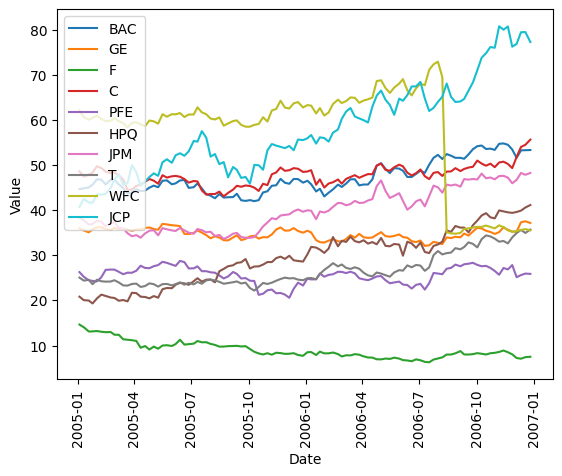

In [3]:
for column in df.columns[:-1]: plt.plot(df[['Date']], df[column], label=column)

plt.xlabel('Date')
plt.xticks(rotation='vertical')
plt.ylabel('Value')
plt.legend()


plt.show()

In [4]:
R_column_names=['R_'+name for name in list(df.columns)[:-1]]
R_df = df[df.columns[:-1]].div(df[df.columns[:-1]].shift(-1))
R_df = R_df.dropna()

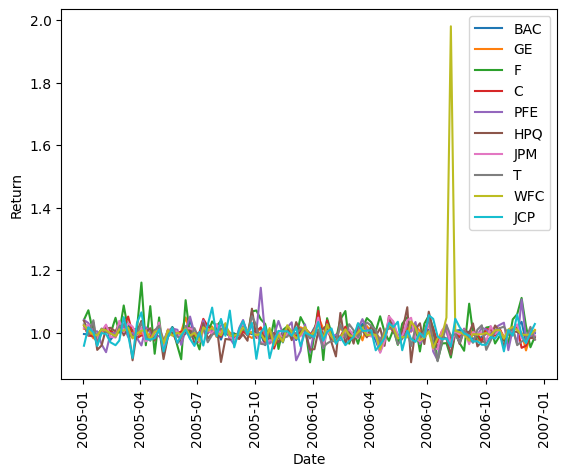

In [5]:
for column in R_df.columns: plt.plot(df[['Date']][:-1], R_df[column], label=column)

plt.xlabel('Date')
plt.xticks(rotation='vertical')
plt.ylabel('Return')
plt.legend()


plt.show()

In [6]:
R_means=R_df.mean()
S=np.outer(R_means, R_means)

In [ ]:
k_e=